# Inception V2,3

In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

In [3]:
num_classes = 1000
input_shape = [299, 299, 3]

batch_size = 16
num_epochs = 10

## Inception module

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,\
                                    GlobalAveragePooling2D, Dense, Dropout, \
                                    Flatten, concatenate, Resizing, BatchNormalization, \
                                    Activation

from typing import Dict
from IPython.display import Image

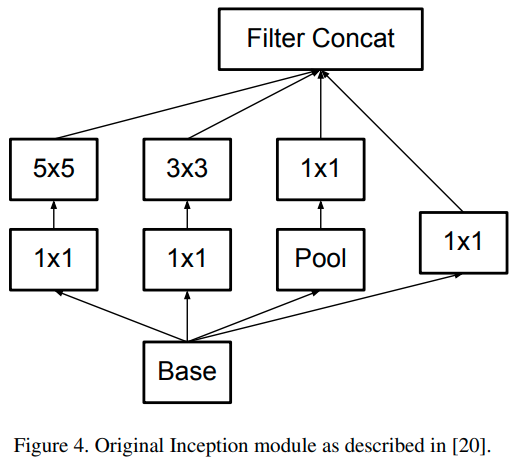

In [5]:
Image('image/inceptionv2-fig4.png')

In [6]:
def inception_origin(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['5x5_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['5x5'], kernel_size=5, 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['3x3_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

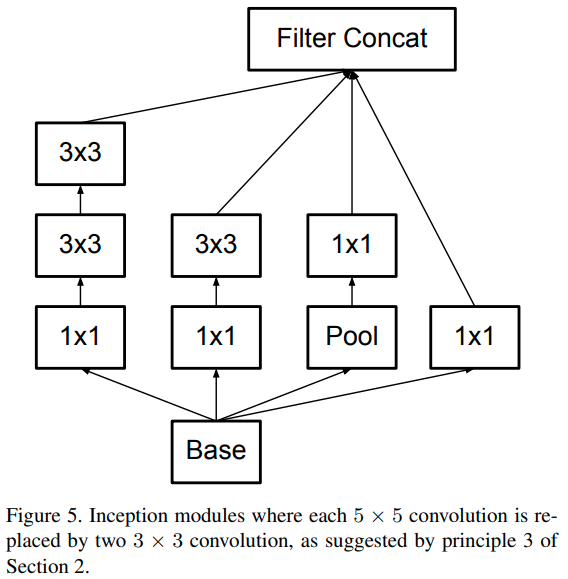

In [7]:
Image('image/inceptionv2-fig5.png')

In [8]:
def inceptionA(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_3_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['2_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

In [9]:
filters_A1 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}
filters_A2 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}
filters_A3 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}

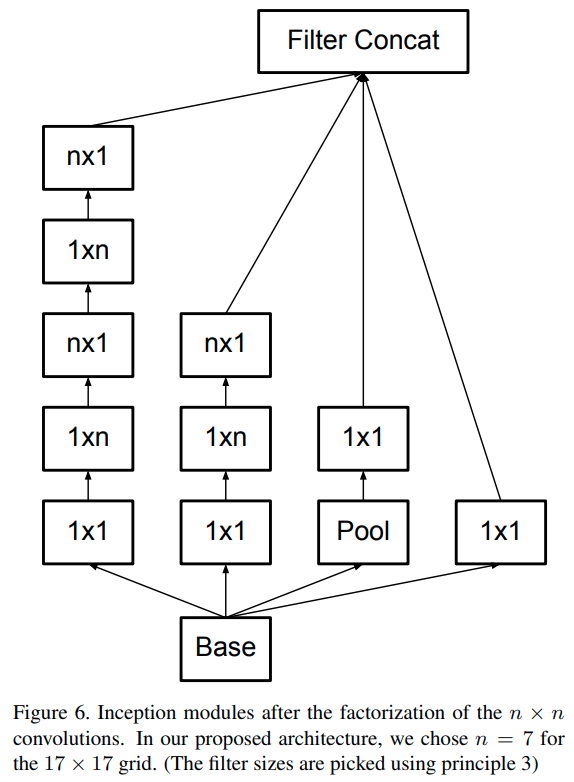

In [10]:
Image('image/inceptionv2-fig6.png')

In [11]:
def inceptionB(filters: Dict[str, int], n=7):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_3_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_4_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_5_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['2_2_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path2)
        path2 = Conv2D(filters=filters['2_2_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

In [12]:
filters_B1 = {"1_1_reduce": 128, "1_2_1xn": 128, "1_3_nx1": 128, 
              "1_4_1xn": 128, "1_5_nx1": 192,
              "2_1_reduce": 128, "2_2_1xn": 128, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B2 = {"1_1_reduce": 160, "1_2_1xn": 160, "1_3_nx1": 160, 
              "1_4_1xn": 160, "1_5_nx1": 192,
              "2_1_reduce": 160, "2_2_1xn": 160, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B3 = {"1_1_reduce": 160, "1_2_1xn": 160, "1_3_nx1": 160, 
              "1_4_1xn": 160, "1_5_nx1": 192,
              "2_1_reduce": 160, "2_2_1xn": 160, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B4 = {"1_1_reduce": 192, "1_2_1xn": 192, "1_3_nx1": 192, 
              "1_4_1xn": 192, "1_5_nx1": 192,
              "2_1_reduce": 192, "2_2_1xn": 192, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B5 = {"1_1_reduce": 192, "1_2_1xn": 192, "1_3_nx1": 192, 
              "1_4_1xn": 192, "1_5_nx1": 192,
              "2_1_reduce": 192, "2_2_1xn": 192, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}

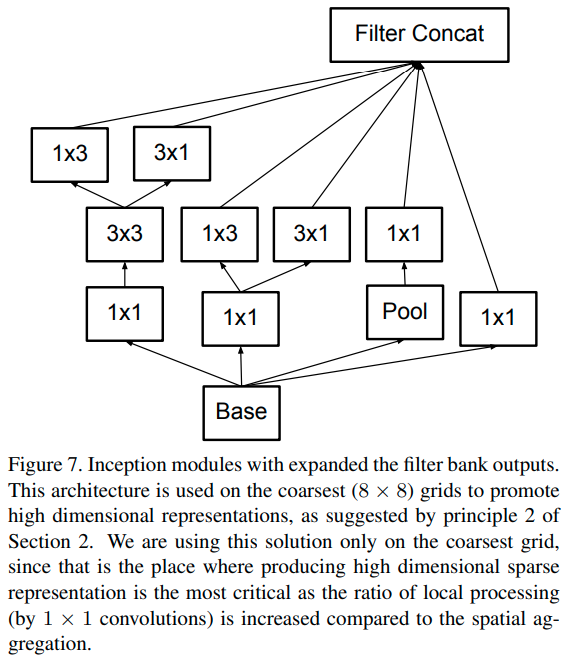

In [13]:
Image('image/inceptionv2-fig7.png')

In [14]:
def inceptionC(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)
        path1_1 = Conv2D(filters=filters['1_3_1x3'], kernel_size=(1, 3), 
                       padding='same', activation='relu')(path1)
        path1_2 = Conv2D(filters=filters['1_4_3x1'], kernel_size=(3, 1), 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2_1 = Conv2D(filters=filters['2_2_1x3'], kernel_size=(1, 3), 
                       padding='same', activation='relu')(path2)
        path2_2 = Conv2D(filters=filters['2_2_3x1'], kernel_size=(3, 1), 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1_1, path1_2, path2_1, path2_2, path3, path4], axis=-1)
    return layer_fn

In [15]:
filters_C1 = {"1_1_reduce": 448, "1_2_3x3": 384, "1_3_1x3": 384, "1_4_3x1": 384,
              "2_1_reduce": 384, "2_2_1x3": 384, "2_2_3x1": 384,
              "pool_proj": 192,
              "1x1": 320}
filters_C2 = {"1_1_reduce": 448, "1_2_3x3": 384, "1_3_1x3": 384, "1_4_3x1": 384,
              "2_1_reduce": 384, "2_2_1x3": 384, "2_2_3x1": 384,
              "pool_proj": 192,
              "1x1": 320}

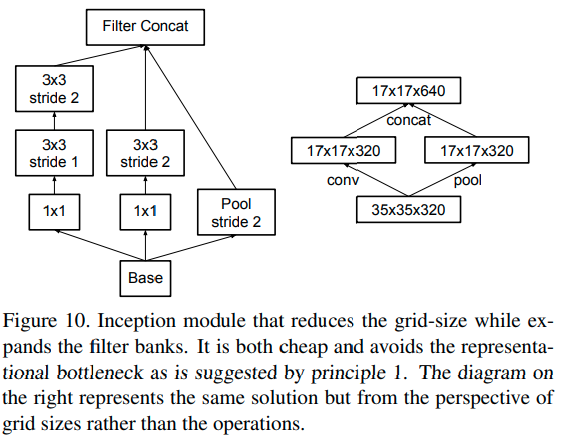

In [16]:
Image('image/inceptionv2-fig10.png')

In [17]:
def reduce_grid(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_3x3'], kernel_size=3, strides=1, 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_3_3x3'], kernel_size=3, strides=2,
                       padding='valid', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['2_2_3x3'], kernel_size=3, strides=2,
                       padding='valid', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=2, padding='valid')(x)
        
        return concatenate([path1, path2, path3], axis=-1)
    return layer_fn

In [18]:
filters_reduce1 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
                   "2_1_reduce": 256, "2_2_3x3": 384}
filters_reduce2 = {"1_1_reduce": 128, "1_2_3x3": 192, "1_3_3x3": 192,
                   "2_1_reduce": 192, "2_2_3x3": 320}

## Inception V2

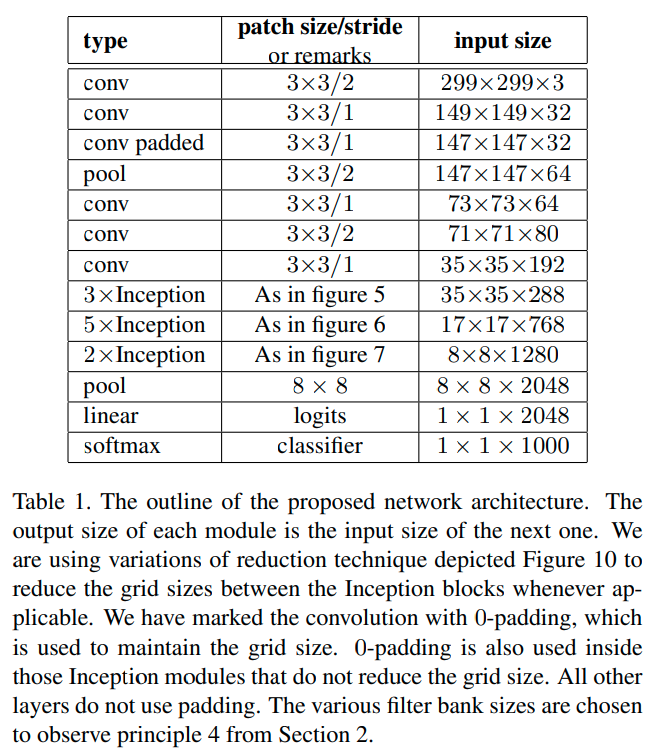

In [19]:
Image('image/inceptionv2-architecture.png')

Grid size 를 줄이기 위해 Inception block 들이 적용될 때마다 그 사이에 Figure 10 에서 명시한 축소 방법을 사용했습니다. Grid size 를 유지하기 위해 사용된 0-padding 을 명시해놓았습니다.


\*\*구현 주의점\*\*
- Inception 바로 직전 Convolution layer 에 0-padding 을 적용시켜줘야 합니다. (Table 1 에선 padded 로 지정되어 있지 않습니다. 논문에서 놓친 부분이 있었는지 설계도와 구현법이 일치하지 않았습니다.)
- Fig 10 에 명시된 모듈로 grid size 가 35x35 -> 17x17 로 변경되려면 Convolution layer 와 Pooling layer 의 0-padding 을 조절해줘야 합니다.

In [20]:
from tensorflow.keras import Model, Input

In [21]:
def aux_classifier_v2(name):
    def layer_fn(x):
        x = AveragePooling2D(pool_size=5, strides=3)(x)
        x = Conv2D(filters=128, kernel_size=1, 
                   padding='valid', activation='relu')(x)
        x = Flatten()(x)
        x = Dense(units=1024, activation=None)(x)
        x = Activation('relu')(x)
        x = Dense(units=num_classes, activation='softmax', name=name+'_output')(x)
        return x
    return layer_fn

In [22]:
def Inception(input_shape, num_classes, aux_classifier):
    input = Input(shape=input_shape)
    x = Resizing(height=299, width=299, interpolation="bilinear")(input)
    x = Conv2D(filters=32, kernel_size=3, strides=2, padding='valid')(x)
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='valid')(x)
    x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='valid')(x)
    x = Conv2D(filters=80, kernel_size=3, strides=1, padding='valid')(x)
    x = Conv2D(filters=192, kernel_size=3, strides=2, padding='valid')(x)
    x = Conv2D(filters=288, kernel_size=3, strides=1, padding='same')(x)
    
    x = inceptionA(filters=filters_A1)(x)
    x = inceptionA(filters=filters_A2)(x)
    x = inceptionA(filters=filters_A3)(x)
    x = reduce_grid(filters=filters_reduce1)(x)
    
    x = inceptionB(filters=filters_B1)(x)
    x = inceptionB(filters=filters_B2)(x)
    x = inceptionB(filters=filters_B3)(x)
    x = inceptionB(filters=filters_B4)(x)
    aux = aux_classifier(name='aux')(x)
    x = inceptionB(filters=filters_B5)(x)
    x = reduce_grid(filters=filters_reduce2)(x)
    
    x = inceptionC(filters=filters_C1)(x)
    x = inceptionC(filters=filters_C2)(x)
    
    x = GlobalAveragePooling2D()(x)
    output = Dense(num_classes, activation='softmax', name='output')(x)
    
    model = Model(inputs=input, outputs=[output, aux])
    
    return model

In [23]:
def InceptionV2(input_shape, num_classes):
    return Inception(input_shape=input_shape,
                    num_classes=num_classes,
                    aux_classifier=aux_classifier_v2)

In [24]:
batch_input_shape = tf.TensorShape((None, *input_shape))

In [25]:
model = InceptionV2(input_shape, num_classes)
model.build(input_shape=batch_input_shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 resizing (Resizing)            (None, 299, 299, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  896         ['resizing[0][0]']               
                                )                                                                 
                                                                                              

In [26]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_train = len(x_train)
num_val = len(x_test)

print('# for train : %d'%(num_train))
print('# for valid : %d'%(num_val))

# for train : 50000
# for valid : 10000


In [27]:
str_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [29]:
x_train = tf.keras.applications.inception_v3.preprocess_input(x_train)
x_test = tf.keras.applications.inception_v3.preprocess_input(x_test)

train_dataset = (x_train, [y_train, y_train])
val_dataset = (x_test, [y_test, y_test])

num_classes = 10
input_shape = [32, 32, 3]

batch_size = 32
num_epochs = 10

In [30]:
model = InceptionV2(input_shape, num_classes)

In [31]:
optimizer = 'sgd'
accuracy_metric = tf.metrics.SparseCategoricalAccuracy(name='acc')
top5_accuracy_metric = tf.metrics.SparseTopKCategoricalAccuracy(k=5, name='top5_acc')

model.compile(optimizer=optimizer,
             loss=['sparse_categorical_crossentropy',
                  'sparse_categorical_crossentropy'],
             loss_weights=[1, 0.4],
             metrics=[accuracy_metric, top5_accuracy_metric])

In [32]:
import os

model_dir = './models/inceptionv2'

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                    restore_best_weights=True),
    
    tf.keras.callbacks.TensorBoard(log_dir=model_dir, 
                                   histogram_freq=0, 
                                   write_graph=True,
                                   write_images=True,
                                   update_freq=100),
    
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(model_dir, 'weights-epoch{epoch:02d}.h5')),
]

In [33]:
import math

train_steps_per_epoch = math.ceil(num_train / batch_size)
val_steps_per_epoch = math.ceil(num_val / batch_size)

inception_v2_history = model.fit(*train_dataset,
                        epochs=num_epochs,
                        steps_per_epoch=train_steps_per_epoch,
                        validation_data=(val_dataset),
                        validation_steps=val_steps_per_epoch,
                        verbose=1, callbacks=callbacks)

Epoch 1/10
1563/1563 [==============================] - 530s 334ms/step - loss: 3.0007 - output_loss: 2.1606 - aux_output_loss: 2.1003 - output_acc: 0.1833 - output_top5_acc: 0.6825 - aux_output_acc: 0.2252 - aux_output_top5_acc: 0.7072 - val_loss: 2.6229 - val_output_loss: 1.9079 - val_aux_output_loss: 1.7875 - val_output_acc: 0.2757 - val_output_top5_acc: 0.8383 - val_aux_output_acc: 0.3434 - val_aux_output_top5_acc: 0.8659
Epoch 2/10
1563/1563 [==============================] - 520s 333ms/step - loss: 2.4064 - output_loss: 1.7696 - aux_output_loss: 1.5920 - output_acc: 0.3461 - output_top5_acc: 0.8602 - aux_output_acc: 0.4241 - aux_output_top5_acc: 0.8974 - val_loss: 2.2779 - val_output_loss: 1.6765 - val_aux_output_loss: 1.5036 - val_output_acc: 0.3815 - val_output_top5_acc: 0.8669 - val_aux_output_acc: 0.4630 - val_aux_output_top5_acc: 0.9074
Epoch 3/10
1563/1563 [==============================] - 530s 339ms/step - loss: 2.0387 - output_loss: 1.5091 - aux_output_loss: 1.3240 - out

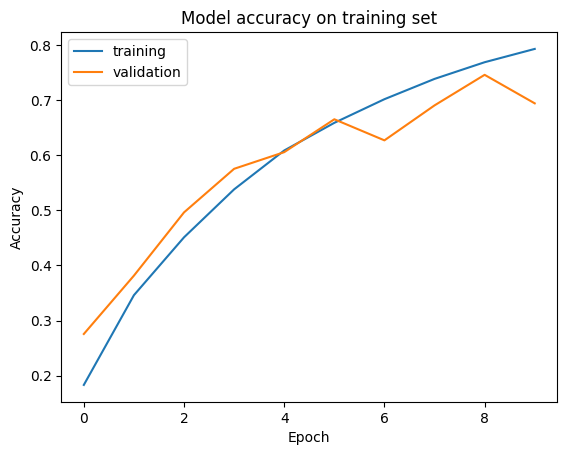

In [34]:
import matplotlib.pyplot as plt

plt.plot(inception_v2_history.history['output_acc'])
plt.plot(inception_v2_history.history['val_output_acc'])
plt.title('Model accuracy on training set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [35]:
# model.evaluate(x_test, y_test, batch_size=32)
model = tf.keras.models.load_model(
    filepath='./models/inceptionv2/weights-epoch10.h5'
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 resizing_1 (Resizing)          (None, 299, 299, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_106 (Conv2D)            (None, 149, 149, 32  896         ['resizing_1[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_107 (Conv2D)            (None, 147, 147, 32  9248        ['conv2d_106[0][0]']       

In [36]:
res = model.evaluate(x_test, y_test, verbose=2, batch_size=32)
res[3]
# print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

313/313 - 29s - loss: 1.2137 - output_loss: 0.8810 - aux_output_loss: 0.8319 - output_acc: 0.6939 - output_top5_acc: 0.9807 - aux_output_acc: 0.7267 - aux_output_top5_acc: 0.9840 - 29s/epoch - 93ms/step


0.6938999891281128

## InceptionV3
### Inceptionv2 와의 차이점

* BN-auxiliary classifier
* Label smoothing
    * $\epsilon$ : 0.1
* Optimzer 를 RMSProp 으로 변경
    * decay : 0.94 every two epoch
    * $\epsilon$ : 1.0
    * learning rate : 0.045
* gradient clipping : 2.0


### BN-auxiliary classifier

In [37]:
def aux_classifier_v3(name):
    def layer_fn(x):
        x = AveragePooling2D(pool_size=5, strides=3)(x)
        x = Conv2D(filters=128, kernel_size=1, 
                   padding='valid', activation='relu')(x)
        x = Flatten()(x)
        x = Dense(units=1024, activation=None)(x)
        x = BatchNormalization(axis=-1)(x)
        x = Activation('relu')(x)
        x = Dropout(0.7)(x)
        x = Dense(units=num_classes, activation='softmax', name=name+'_output')(x)
        return x
    return layer_fn

In [38]:
def InceptionV3(input_shape, num_classes):
    return Inception(input_shape=input_shape,
                    num_classes=num_classes,
                    aux_classifier=aux_classifier_v3)

In [39]:
model_v3 = InceptionV3(input_shape, num_classes)

### Label smoothing

In [40]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_train = len(x_train)
num_val = len(x_test)

print('# for train : %d'%(num_train))
print('# for valid : %d'%(num_val))

# for train : 50000
# for valid : 10000


In [41]:
x_train = tf.keras.applications.inception_v3.preprocess_input(x_train)
x_test = tf.keras.applications.inception_v3.preprocess_input(x_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

In [42]:
losses = tf.keras.losses.CategoricalCrossentropy(
    label_smoothing=0.1,
    name='categorical_crossentropy'
)

### RMSProp

In [43]:
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.045, epsilon=1.0,
    name='RMSprop',
)

In [44]:
import os

model_dir = './models/inceptionv3'

def scheduler(epoch, lr):
    if epoch % 2 == 0:
        return lr * 0.94
    else:
        return lr

callbacks = [
    tf.keras.callbacks.LearningRateScheduler(scheduler),
    
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                    restore_best_weights=True),
    
    tf.keras.callbacks.TensorBoard(log_dir=model_dir, 
                                   histogram_freq=0, 
                                   write_graph=True,
                                   write_images=True,
                                   update_freq=100),
    
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(model_dir, 'weights-epoch{epoch:02d}.h5')),
]

In [45]:
accuracy_metric = tf.metrics.CategoricalAccuracy(name='acc')
top5_accuracy_metric = tf.metrics.TopKCategoricalAccuracy(k=5, name='top5_acc')

model_v3.compile(optimizer=optimizer,
             loss={'output': losses, 'aux_output': losses},
             loss_weights={'output': 1,'aux_output': 0.4},
             metrics=[accuracy_metric, top5_accuracy_metric])

In [46]:
batch_size = 16
num_epochs = 10

In [47]:
import math

train_steps_per_epoch = math.ceil(num_train / batch_size)
val_steps_per_epoch = math.ceil(num_val / batch_size)

inception_v3_history = model_v3.fit(x = x_train,
                        y = {"output": y_train, 
                             "aux_output": y_train},
                        validation_data=(x_test,
                            {"output": y_test, 
                             "aux_output": y_test}),
                        epochs=num_epochs,
                        steps_per_epoch=train_steps_per_epoch,
                        validation_steps=val_steps_per_epoch,
                        verbose=1, callbacks=callbacks)

Epoch 1/10
3125/3125 [==============================] - 619s 196ms/step - loss: 2.7734 - output_loss: 2.0548 - aux_output_loss: 1.7963 - output_acc: 0.2320 - output_top5_acc: 0.7589 - aux_output_acc: 0.4066 - aux_output_top5_acc: 0.8846 - val_loss: 2.4481 - val_output_loss: 1.8300 - val_aux_output_loss: 1.5451 - val_output_acc: 0.3724 - val_output_top5_acc: 0.8698 - val_aux_output_acc: 0.5231 - val_aux_output_top5_acc: 0.9407 - lr: 0.0423
Epoch 2/10
3125/3125 [==============================] - 607s 194ms/step - loss: 2.1912 - output_loss: 1.6034 - aux_output_loss: 1.4695 - output_acc: 0.4829 - output_top5_acc: 0.9252 - aux_output_acc: 0.5724 - aux_output_top5_acc: 0.9459 - val_loss: 2.0062 - val_output_loss: 1.4672 - val_aux_output_loss: 1.3474 - val_output_acc: 0.5670 - val_output_top5_acc: 0.9420 - val_aux_output_acc: 0.6361 - val_aux_output_top5_acc: 0.9549 - lr: 0.0423
Epoch 3/10
3125/3125 [==============================] - 607s 194ms/step - loss: 1.8302 - output_loss: 1.3211 - aux

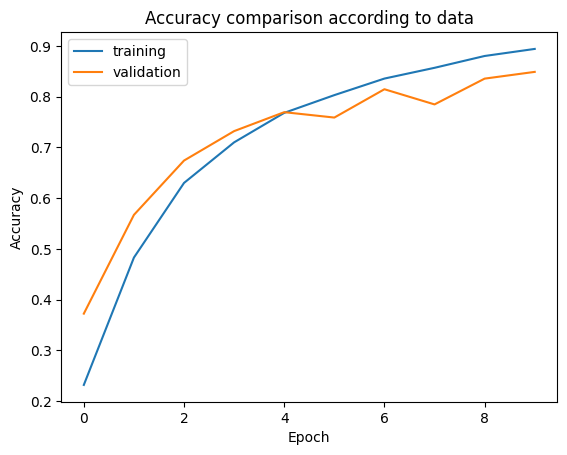

In [72]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(inception_v3_history.history['output_acc'])
plt.plot(inception_v3_history.history['val_output_acc'])
plt.title('Accuracy comparison according to data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

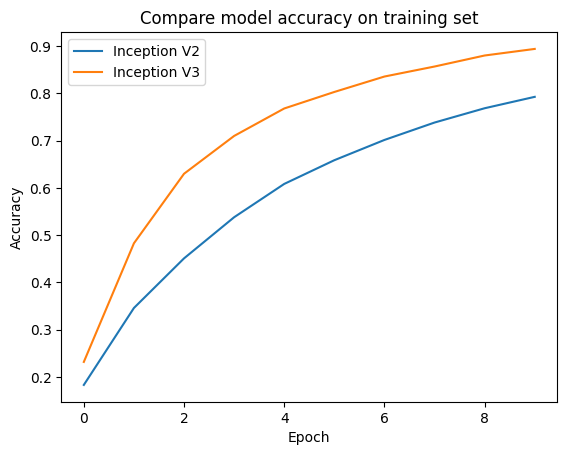

In [74]:
import matplotlib.pyplot as plt

plt.plot(inception_v2_history.history['output_acc'])
plt.plot(inception_v3_history.history['output_acc'])
plt.title('Compare model accuracy on training set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Inception V2', 'Inception V3'], loc='upper left')
plt.show()

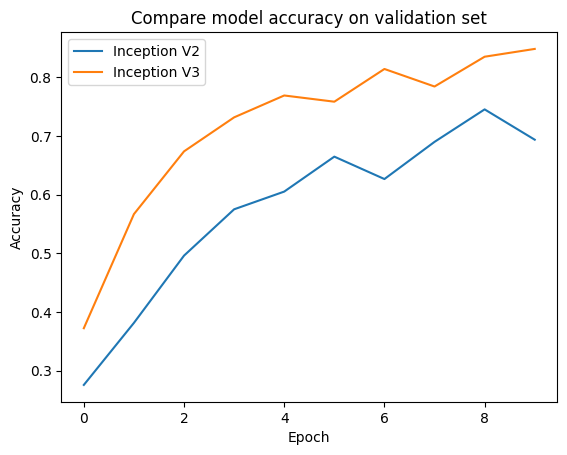

In [75]:
import matplotlib.pyplot as plt

plt.plot(inception_v2_history.history['val_output_acc'])
plt.plot(inception_v3_history.history['val_output_acc'])
plt.title('Compare model accuracy on validation set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Inception V2', 'Inception V3'], loc='upper left')
plt.show()

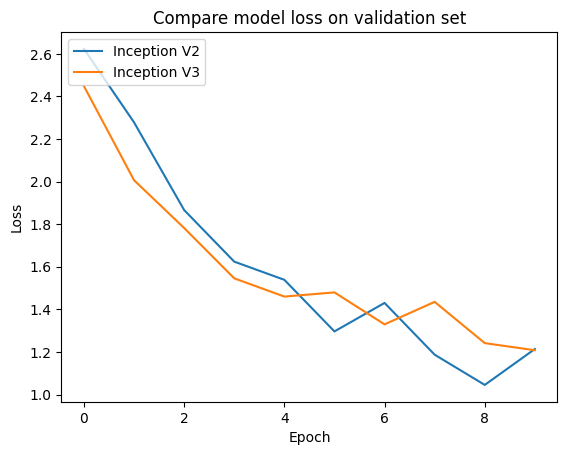

In [76]:
import matplotlib.pyplot as plt

plt.plot(inception_v2_history.history['val_loss'])
plt.plot(inception_v3_history.history['val_loss'])
plt.title('Compare model loss on validation set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Inception V2', 'Inception V3'], loc='upper left')
plt.show()

In [77]:
(_, _), (visual_image, _) = cifar10.load_data()

In [78]:
import io
import random

import numpy as np

def image_grid():
    x_test = tf.keras.applications.inception_v3.preprocess_input(visual_image)
    pred, _ = model_v3.predict(x_test)
    pred = np.argmax(pred, axis=1)
    figure = plt.figure(figsize=(10,10))
    
    random_index = random.sample(range(len(x_test)), 25)
    for i in range(25):
        plt.subplot(5, 5, i + 1, title=str_labels[pred[random_index[i]]])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(visual_image[random_index[i]], cmap=plt.cm.binary)

    return figure

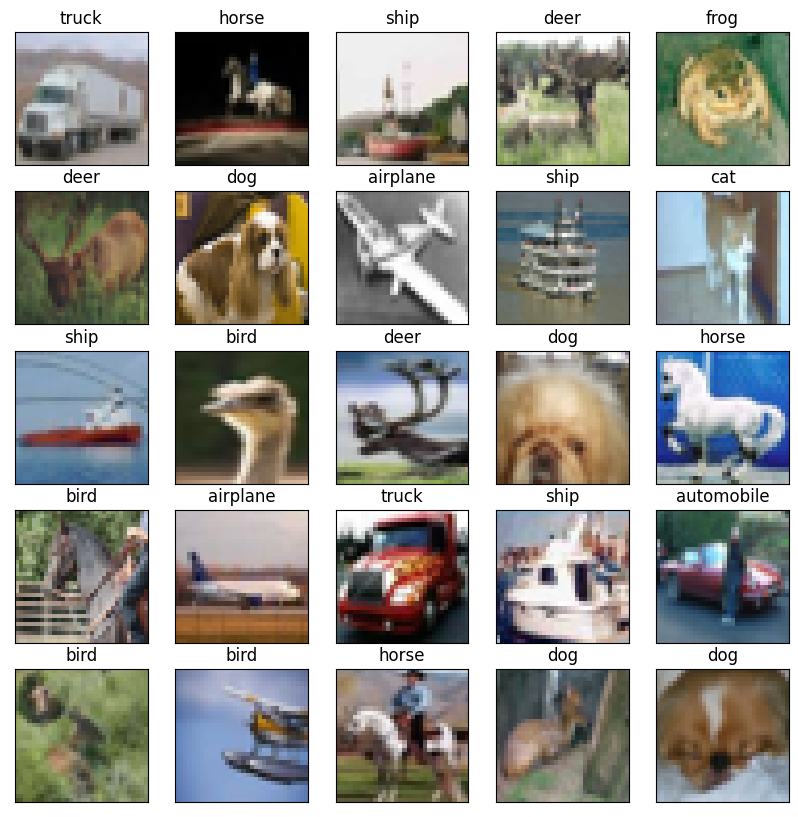

In [79]:
image_grid()